# AirBnb Berlin 2020

# Questions
1.What are the most important facilities in listing in order to get a good review rating!?  
2.How hot is the accomodation market in Seattle - EUA? (based on airbnb's data).  
3.How did the average price evolve in 2016?  
4.Heat map of hotest neighbourhood / of price?  

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
df_listings = pd.read_csv('/content/drive/My Drive/data-science-notebooks/airbnb-berlin/listings.csv')
df_listings.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200317045838,2020-03-17,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",NaN,NaN,https://a0.muscache.com/im/pictures/243355/84a...,NaN,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,100%,80%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,...,$20.00,62,1125,62,62,1125,1125,62.0,1125.0,3 weeks ago,t,0,0,0,140,2020-03-17,145,1,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.11
1,3309,https://www.airbnb.com/rooms/3309,20200317045838,2020-03-17,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",The flat is a strictly non-smoking facility! A...,The public transportation is excellent: Severa...,I do have a strictly non-smoker-flat. Keep th...,I'm working as a freelancing photographer. My ...,House-Rules and Information ..............(deu...,NaN,NaN,https://a0.muscache.com/im/pictures/29054294/b...,NaN,4108,https://www.airbnb.com/users/show/4108,Jana,2008-11-07,"Berlin, Berlin, Germany",ENJOY EVERY DAY AS IF IT'S YOUR LAST!!! \r\n\r...,within a day,100%,100%,f,https://a0.muscache.com/im/pictures/user/d8049...,https://a0.muscache.com/im/pictures/user/d8049...,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,...,$18.00,7,35,7,7,35,35,7.0,35.0,2 months ago,t,0,15,45,320,2020-03-17,27,1,2013-08-12,2019-05-31,89.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.34
2,6883,https://www.airbnb.com/rooms/6883,20200317045838,2020-03-17,Stylish East Side Loft in Center with AC & 2 b...

In [246]:
df_reviews = pd.read_csv('/content/drive/My Drive/data-science-notebooks/airbnb-berlin/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a..."
1,3176,134722,2010-11-07,263467,George,Britta's apartment in Berlin is in a great are...
2,3176,144064,2010-11-24,76726,Patricia,"Fantastic, large place in good location. Only ..."
3,3176,156702,2010-12-21,291657,Benedetta,L'appartamento di Britta è molto largo carino ...
4,3176,165048,2011-01-04,279789,Aude,We went in Berlin for the new year eve. The ap...


In [247]:
df_calendar = pd.read_csv('/content/drive/My Drive/data-science-notebooks/airbnb-berlin/calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3176,2020-03-17,f,$90.00,$90.00,62,1125
1,3176,2020-03-18,f,$90.00,$90.00,62,1125
2,3176,2020-03-19,f,$90.00,$90.00,62,1125
3,3176,2020-03-20,f,$90.00,$90.00,62,1125
4,3176,2020-03-21,f,$90.00,$90.00,62,1125


In [248]:
print(f"df_listings.shape = {df_listings.shape}")
print(f"df_reviews.shape = {df_reviews.shape}")
print(f"df_calendar.shape = {df_calendar.shape}")

df_listings.shape = (25164, 106)
df_reviews.shape = (545703, 6)
df_calendar.shape = (9184860, 7)


In [249]:
df_listings.loc[:, 'price':'extra_people'].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people
0,$90.00,$520.00,"$1,900.00",$300.00,$100.00,2,$20.00
1,$28.00,$175.00,$599.00,$250.00,$30.00,1,$18.00
2,$125.00,$599.00,"$1,399.00",$0.00,$39.00,1,$0.00
3,$33.00,NaN,NaN,$0.00,$0.00,1,$27.00
4,$180.00,$650.00,NaN,$400.00,$80.00,5,$10.00


# Acommodations Overview

1. How do prices vary per neigborhood ?
2. What neighborhood has the most expensive listings ?
3. What does differ a expensive listing to a cheap listining in terms of facilities? What are the most popular facilities?
4. How facilities impact in the review score?

In [0]:
df_listings['float_price'] = df_listings['price'].str.replace('[$\,]','').astype('float64')
df_listings = df_listings.sort_values(by=['float_price'])
df_grouped = df_listings.groupby('neighbourhood')['float_price']

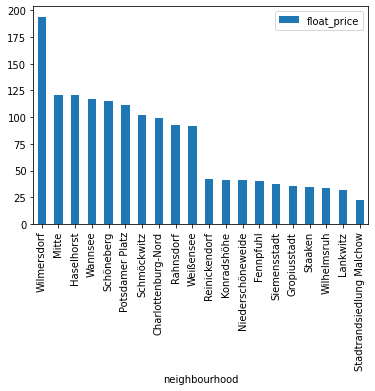

In [251]:
df_mean = df_grouped.mean().sort_values(ascending=False)
df_mean = df_mean.reset_index()
df_mean = pd.concat([df_mean[:10], df_mean[-10:]])
df_mean.plot.bar(x='neighbourhood')

In [0]:
indexer = [item in list(df_mean[:10]['neighbourhood']) for item in df_listings['neighbourhood']]

amen_list = df_listings[indexer]['amenities']

In [0]:
amen_list = [elem.replace('{','').replace('}', '').replace('"','').split(',') for elem in amen_list]

In [0]:
df_amenities = pd.DataFrame(pd.DataFrame(amen_list).values.flatten())
df_amenities = df_amenities.dropna()
amenitites_counts = df_amenities[0].value_counts()
top_amenities = amenitites_counts[[count > 1000 for count in amenitites_counts]]

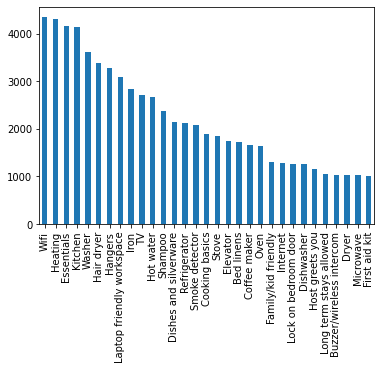

In [255]:
top_amenities.plot.bar()

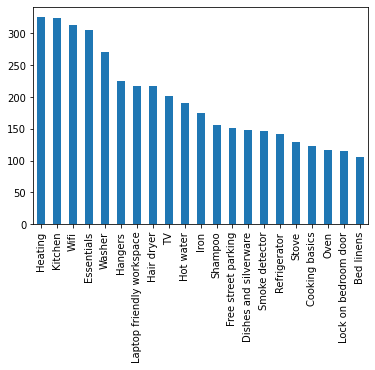

In [259]:
indexer = [item in list(df_mean[-10:]['neighbourhood']) for item in df_listings['neighbourhood']]

amen_list = df_listings[indexer]['amenities']

amen_list = [elem.replace('{','').replace('}', '').replace('"','').split(',') for elem in amen_list]

df_amenities = pd.DataFrame(pd.DataFrame(amen_list).values.flatten())
df_amenities = df_amenities.dropna()
amenitites_counts = df_amenities[0].value_counts()
top_amenities = amenitites_counts[[count > 100 for count in amenitites_counts]]
top_amenities.plot.bar()

# Conclusion

Amenities do not have huge impact on price. Nevertheless, there is a set of essential things you **MUST** have in your accomdation.

# Hottest Neibourghoods

